In [1]:
from pathlib import Path
import sys
from autopilot import prefs
from matplotlib import pyplot as plt
import numpy as np
%matplotlib notebook

plax_dir = Path(prefs.get('PLUGINDIR'))
sys.path.append(str(plax_dir))
from parallax import test_kalman
from parallax.tests import utils

In [2]:
pos, vel, accel = test_kalman.sine_data(
    total_time=10, 
    accel_noise=30,
    pos_noise=0.3)

measurements, _, _ = test_kalman.test_kalman_position(pos, accel)

<IPython.core.display.Javascript object>


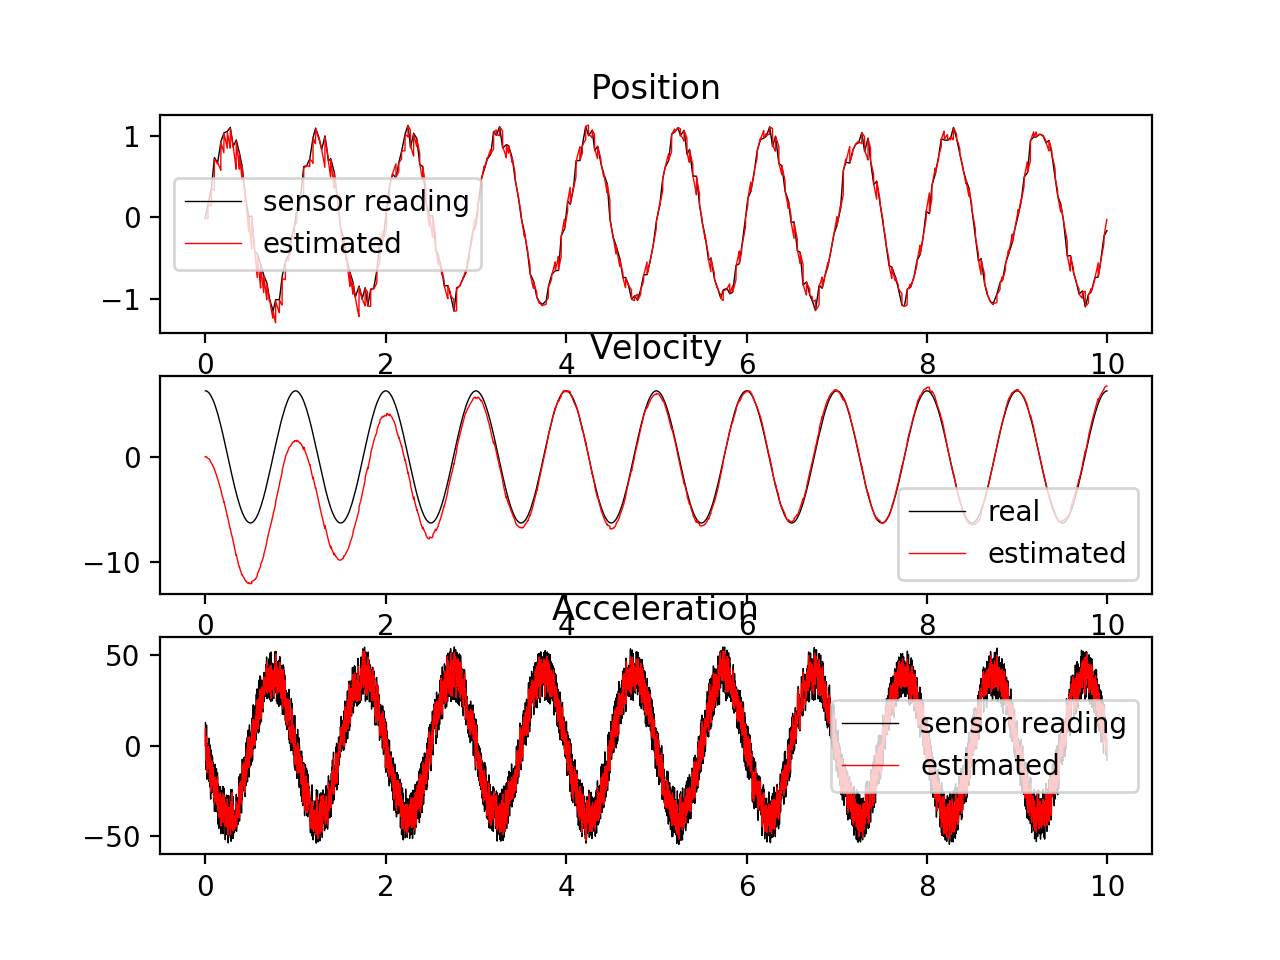

In [3]:
utils.plot_kalman(pos, vel, accel, measurements)

<IPython.core.display.Javascript object>


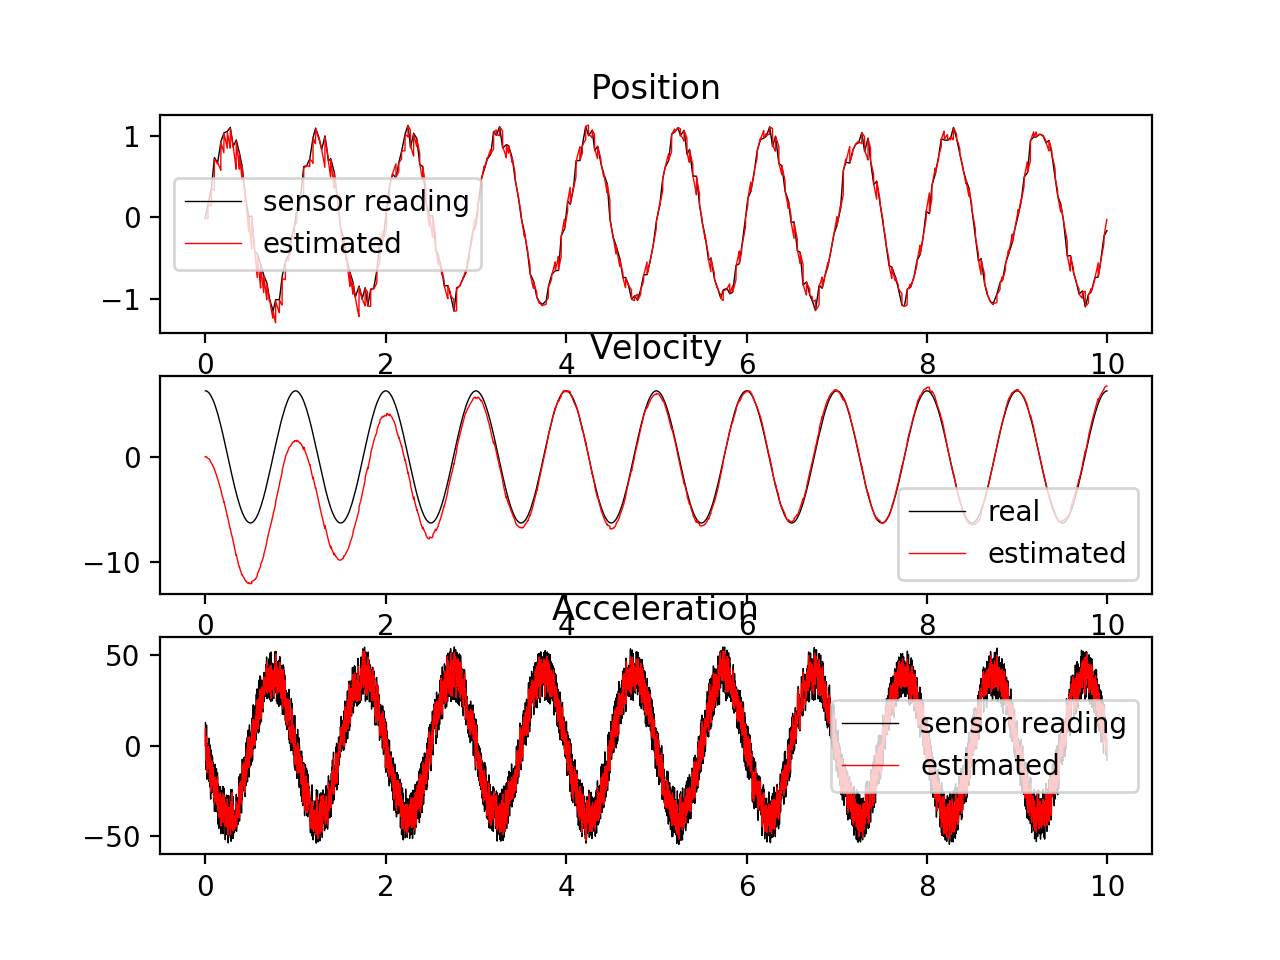

In [4]:
pos1, vel1, accel1 = test_kalman.sine_data(
    total_time=10, 
    accel_noise=100,
    pos_noise=1)

measurements, _, _ = test_kalman.test_kalman_position(pos, accel)
utils.plot_kalman(pos, vel, accel, measurements)

<IPython.core.display.Javascript object>


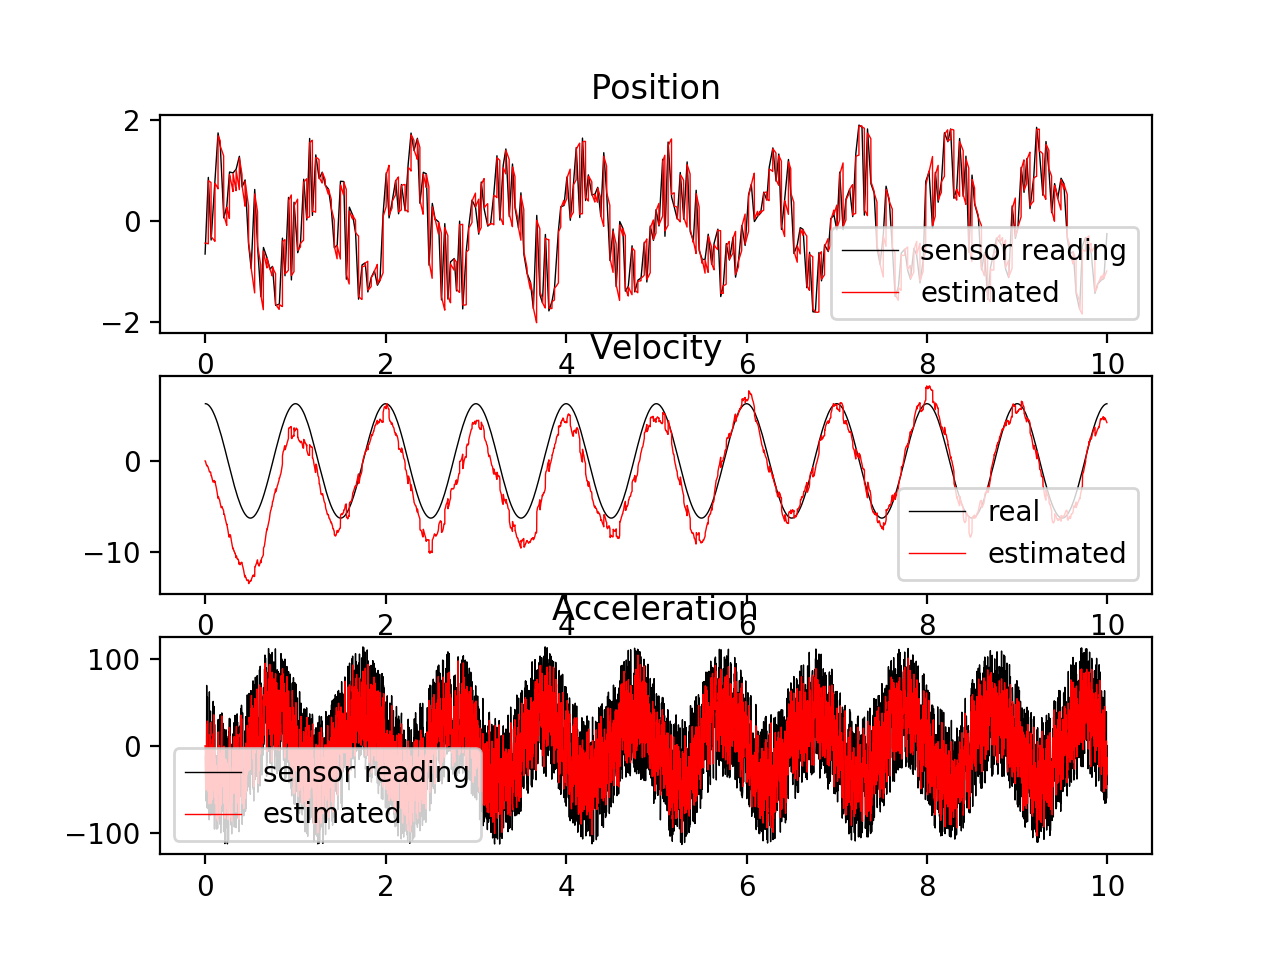

In [5]:
pos2, vel2, accel2 = test_kalman.sine_data(
    total_time=10, 
    accel_noise=150,
    pos_noise=2)

measurements2, _, _ = test_kalman.test_kalman_position(pos2, accel2)
utils.plot_kalman(pos2, vel2, accel2, measurements2)

<IPython.core.display.Javascript object>


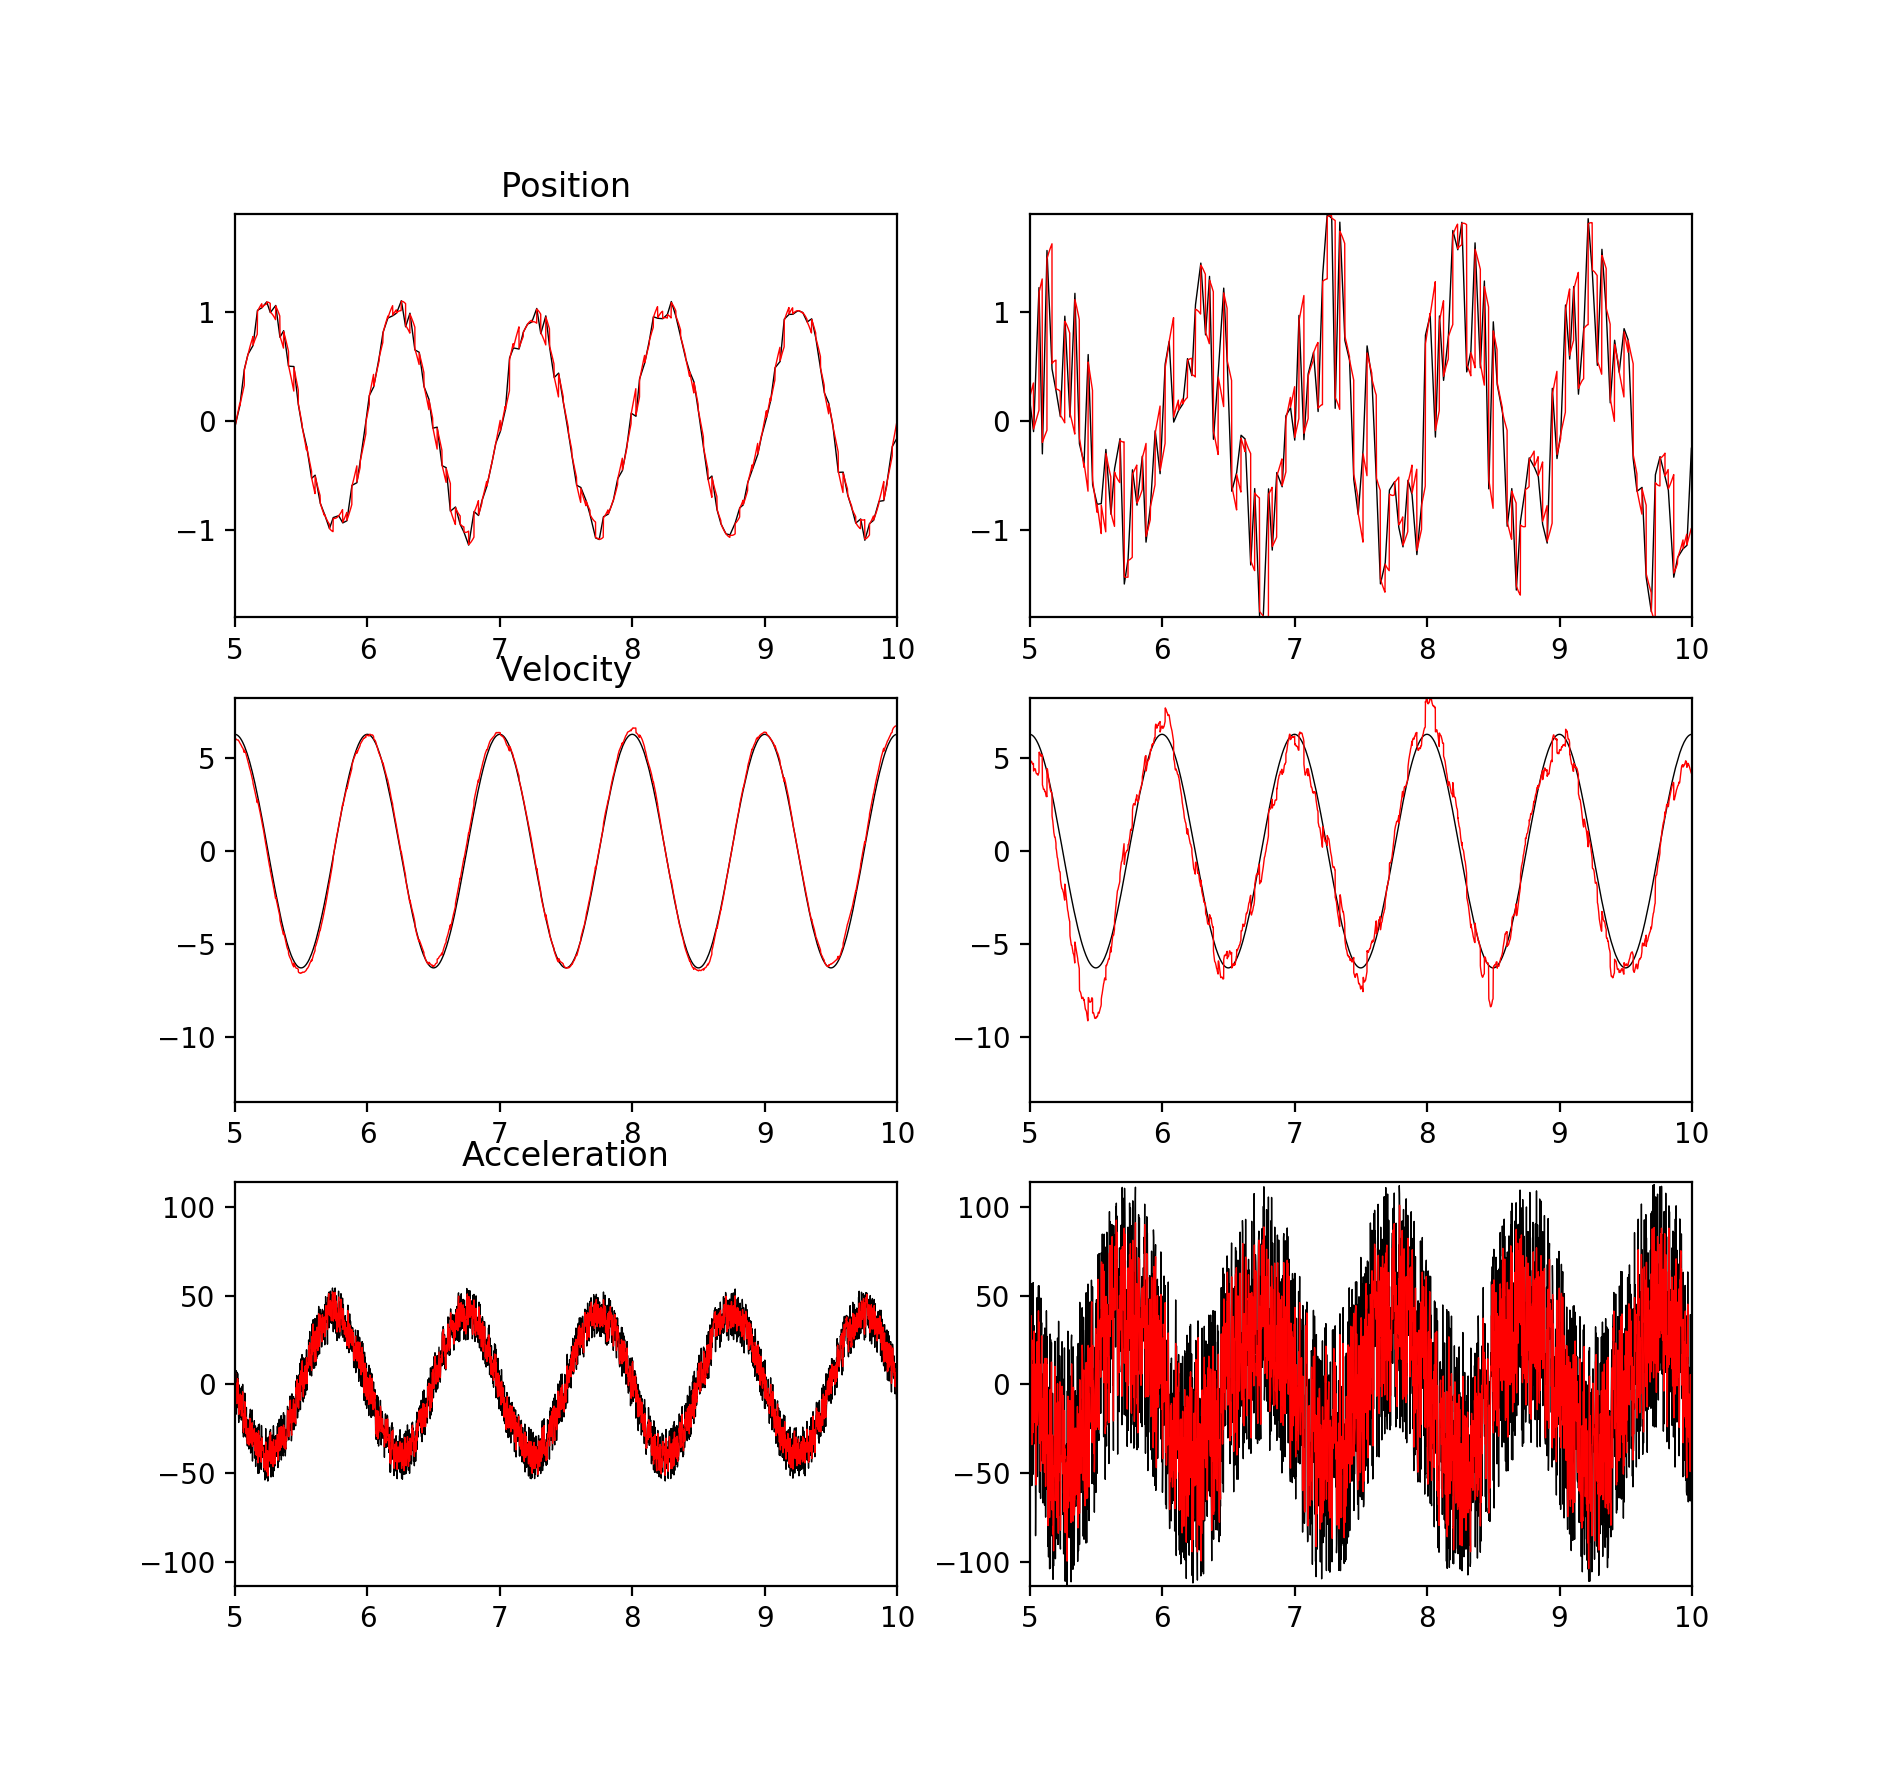

In [7]:
fig, ax = plt.subplots(3,2)

meas_x = [x.timestamp for x in measurements]
meas_x2 = [x.timestamp for x in measurements2]


ax[0,0].plot([x.timestamp for x in pos], [x.value for x in pos], 'k-', linewidth=0.5)
ax[0,1].plot([x.timestamp for x in pos2], [x.value for x in pos2], 'k-', linewidth=0.5)
ax[0,0].plot(meas_x, [x.position for x in measurements], 'r-', linewidth=0.5)
ax[0,1].plot(meas_x2, [x.position for x in measurements2], 'r-', linewidth=0.5)

ax[1,0].plot([x.timestamp for x in accel], vel[:-1], 'k-', linewidth=0.5)
ax[1,1].plot([x.timestamp for x in accel2], vel2[:-1], 'k-', linewidth=0.5)
ax[1,0].plot(meas_x, [x.velocity for x in measurements], 'r-', linewidth=0.5)
ax[1,1].plot(meas_x2, [x.velocity for x in measurements2], 'r-', linewidth=0.5)

ax[2,0].plot([x.timestamp for x in accel], [x.value for x in accel], 'k-', linewidth=0.5)
ax[2,1].plot([x.timestamp for x in accel2], [x.value for x in accel2], 'k-', linewidth=0.5)
ax[2,0].plot(meas_x, [x.acceleration for x in measurements], 'r-', linewidth=0.5)
ax[2,1].plot(meas_x2, [x.acceleration for x in measurements2], 'r-', linewidth=0.5)

pos_min, pos_max = np.min([x.value for x in pos + pos2]), np.max([x.value for x in pos + pos2])
vel_min, vel_max = np.min([x.velocity for x in measurements + measurements2]), np.max([x.velocity for x in measurements + measurements2])
acc_min, acc_max = np.min([x.value for x in accel + accel2]), np.max([x.value for x in accel + accel2])

ax[0,0].set_title('Position')
ax[1,0].set_title('Velocity')
ax[2,0].set_title('Acceleration')

ax[0,0].set_ylim((pos_min, pos_max))
ax[1,0].set_ylim((vel_min, vel_max))
ax[2,0].set_ylim((acc_min, acc_max))
ax[0,1].set_ylim((pos_min, pos_max))
ax[1,1].set_ylim((vel_min, vel_max))
ax[2,1].set_ylim((acc_min, acc_max))
for axis in ax.flatten():
    axis.set_xlim((5,10))
